In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
datasets = pd.read_csv('targetdir/ds-take-home-dataset.csv')
datasets.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0


In [4]:
datasets_id = datasets['id'][0:100]

In [5]:
datasets.shape

(1029850, 9)

In [6]:
data_samples = datasets.copy()

In [7]:
# Took a sample set of data from population
Data_Sample = data_samples.sample(frac =0.1)

In [8]:
Data_Sample.shape

(102985, 9)

In [9]:
Data_Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102985 entries, 386706 to 801863
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          102985 non-null  int64  
 1   attr1       102985 non-null  int64  
 2   attr2       102985 non-null  int64  
 3   attr3       84313 non-null   float64
 4   attr4       86308 non-null   float64
 5   attr5       49496 non-null   float64
 6   attr6       102985 non-null  float64
 7   title       102976 non-null  object 
 8   sold_price  102985 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 7.9+ MB


In [10]:
print('The Number Of Unique values is', 
      Data_Sample.apply(lambda x : len(x.unique())))

The Number Of Unique values is id            102701
attr1              4
attr2             35
attr3            292
attr4           4154
attr5              4
attr6           1733
title          94650
sold_price      4081
dtype: int64


# Treating the Missing Values

In [11]:
df1 = Data_Sample.isnull().sum().to_frame().rename(columns= {0 : 'Missing values'})
df2 = Data_Sample.dtypes.to_frame().rename({1:'Dtypes'})
df = pd.concat([df1,df2], axis =1)
df

,Missing values,0
id,0,int64
attr1,0,int64
attr2,0,int64
attr3,18672,float64
attr4,16677,float64
attr5,53489,float64
attr6,0,float64
title,9,object
sold_price,0,float64


In [12]:
#Filling Missing Values
Data_Sample['attr3'] = Data_Sample['attr3'].fillna(Data_Sample['attr3'].mean())
Data_Sample['attr4'] = Data_Sample['attr4'].fillna(Data_Sample['attr4'].mean())
Data_Sample['attr5'] = Data_Sample['attr5'].fillna(0)
Data_Sample.dropna(subset=['title'], inplace=True)

In [13]:
Data_Sample.isnull().sum()

id            0
attr1         0
attr2         0
attr3         0
attr4         0
attr5         0
attr6         0
title         0
sold_price    0
dtype: int64

In [14]:
Data_Sample['attr3'] = Data_Sample['attr3'].astype(int)
Data_Sample['attr4'] = Data_Sample['attr4'].astype(int)
Data_Sample['attr5'] = Data_Sample['attr5'].astype(int)
Data_Sample['attr6'] = Data_Sample['attr6'].astype(int)
Data_Sample['sold_price'] = Data_Sample['sold_price'].astype(int)

In [15]:
Data_Sample_Withoutitle = Data_Sample.copy()

In [16]:
Data_Sample_Withoutitle = Data_Sample[['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6','sold_price']]

# Histogram Plot

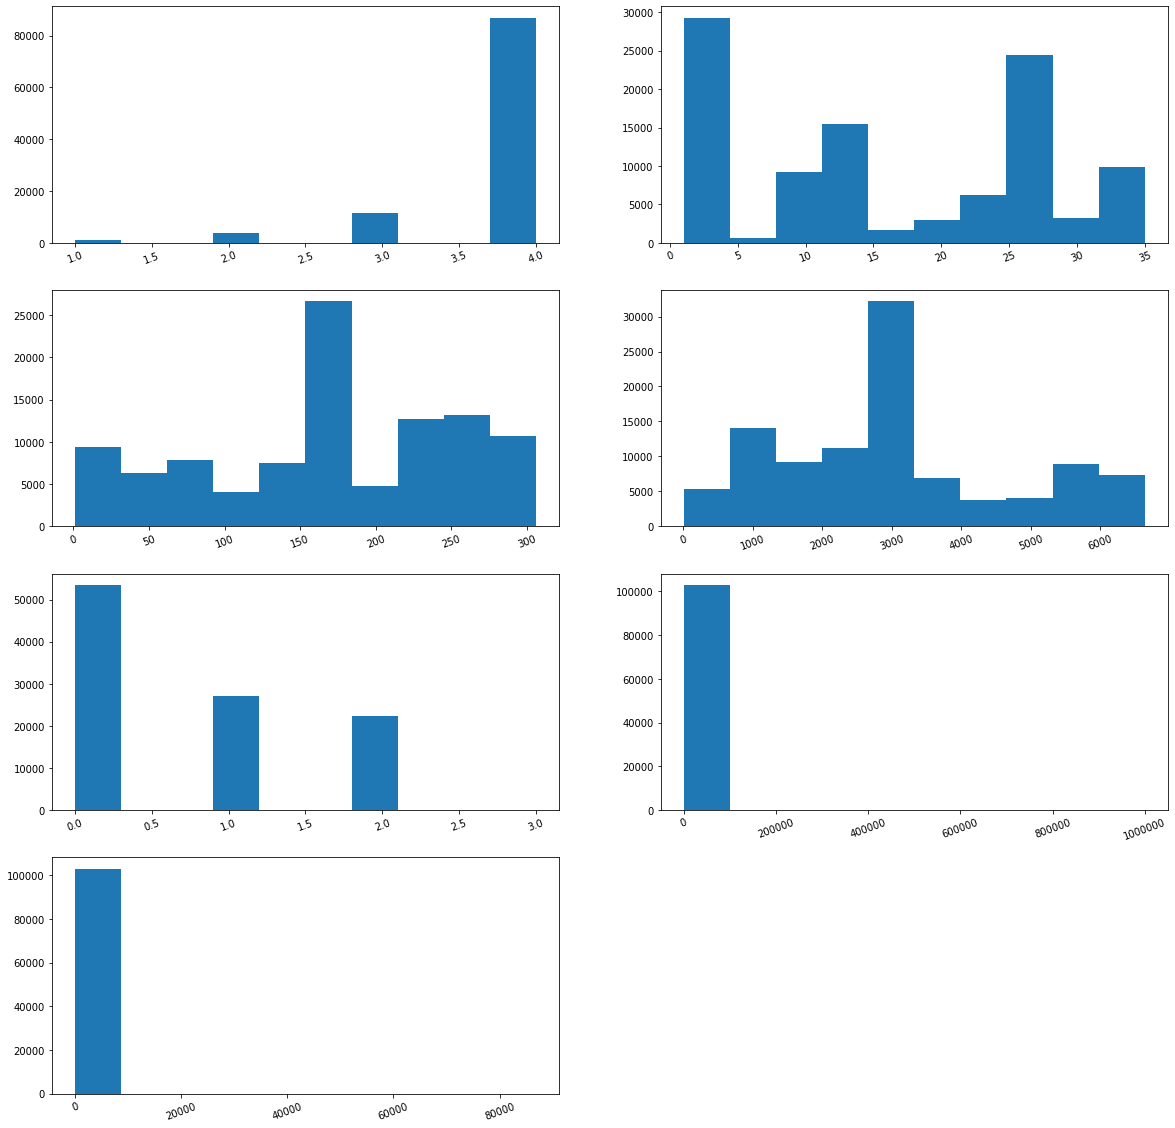

In [17]:
plt.figure(figsize=(20,20))
features = ['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'sold_price']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    plt.hist(x=i[1], data=Data_Sample_Withoutitle)
    plt.xticks(rotation = 20)

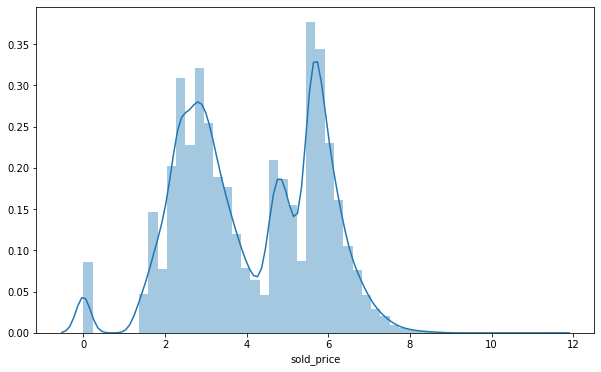

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(np.log1p(Data_Sample['sold_price']))

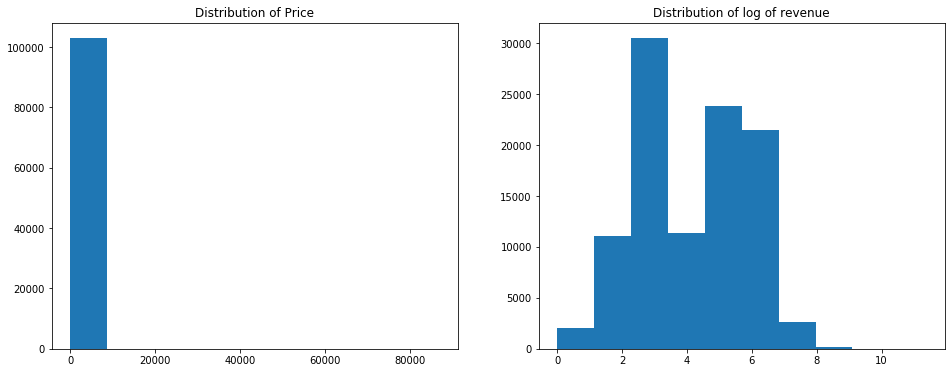

In [19]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(Data_Sample['sold_price']);
plt.title('Distribution of Price');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(Data_Sample['sold_price']));
plt.title('Distribution of log of revenue');

# Outlier Treatment

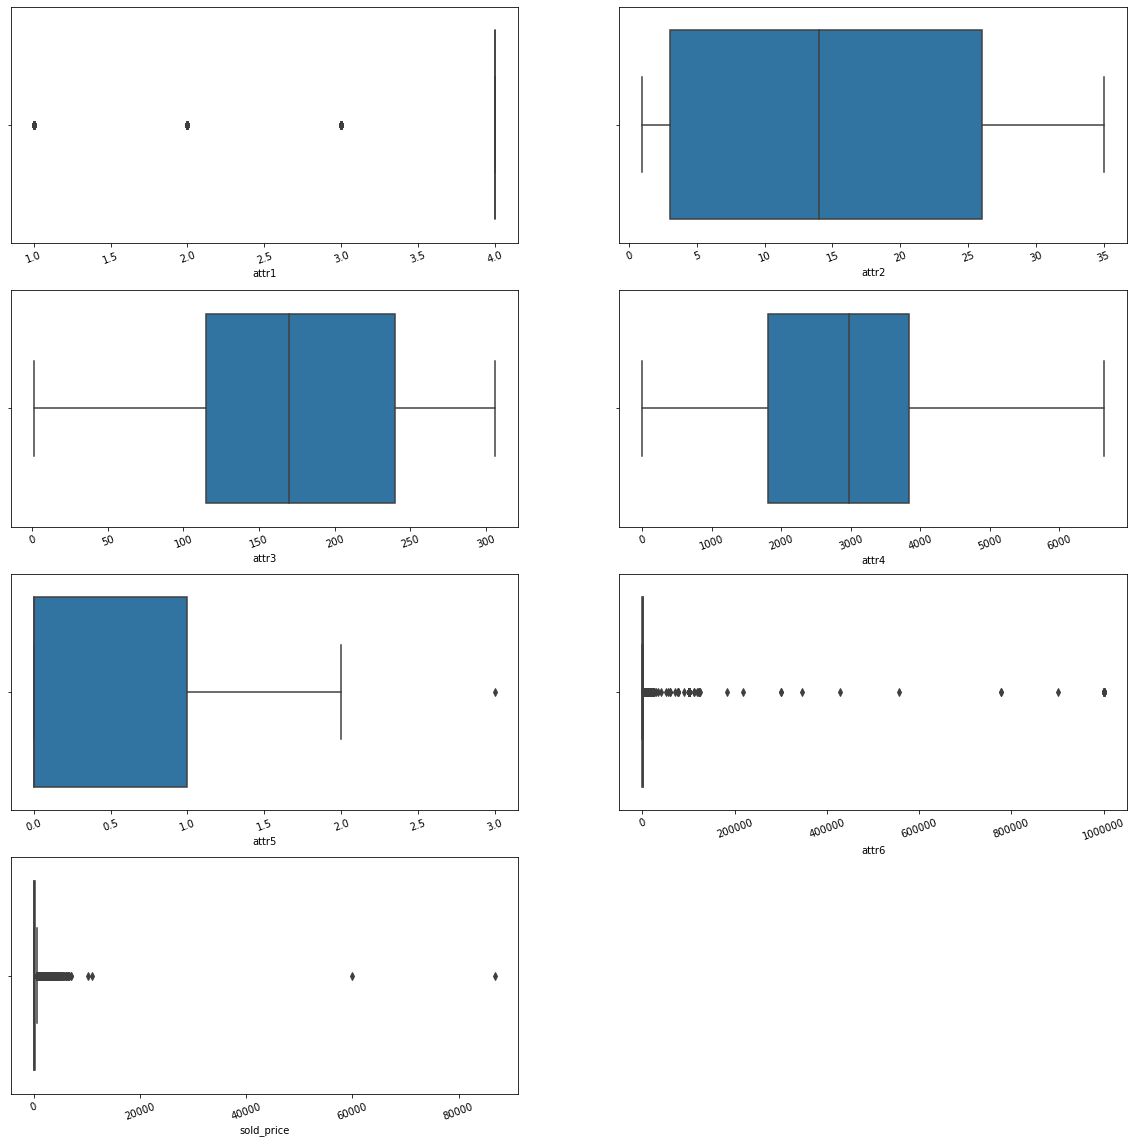

In [20]:
plt.figure(figsize=(20,20))
features = ['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'sold_price']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=Data_Sample)
    plt.xticks(rotation = 20)

In [21]:
Q1 = Data_Sample.quantile(0.10)
Q3 = Data_Sample.quantile(0.90)
IQR = Q3 - Q1
print(IQR)

id            799891.5
attr1              1.0
attr2             28.0
attr3            238.0
attr4           4850.0
attr5              2.0
attr6           1250.0
sold_price       478.0
dtype: float64


In [22]:
Data_Sample_out = Data_Sample[~((Data_Sample < (Q1 - 1.5 * IQR)) |(Data_Sample > (Q3 + 1.5 * IQR))).any(axis=1)]
print('The Actual data taken for problem', Data_Sample.shape)
print('The data after Outlier treatment',Data_Sample_out.shape)

The Actual data taken for problem (102976, 9)
The data after Outlier treatment (99456, 9)


In [23]:
Data_Sample_out.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
386706,133110,4,26,225,3777,0,30,bow sandals,3
873348,484521,4,12,30,5520,2,585,theory blazer,70
851025,280360,4,33,267,3871,0,0,pink victoria's secret sweatshirt,20
821846,764737,4,3,89,2896,0,1000,louis vuitton crossbody cosmetic pouch,250
777589,626607,4,3,240,1996,1,795,jolie gucci bag with charms and black patent trim,250


Text(0.5, 1, 'Correlaion between Independent variables')

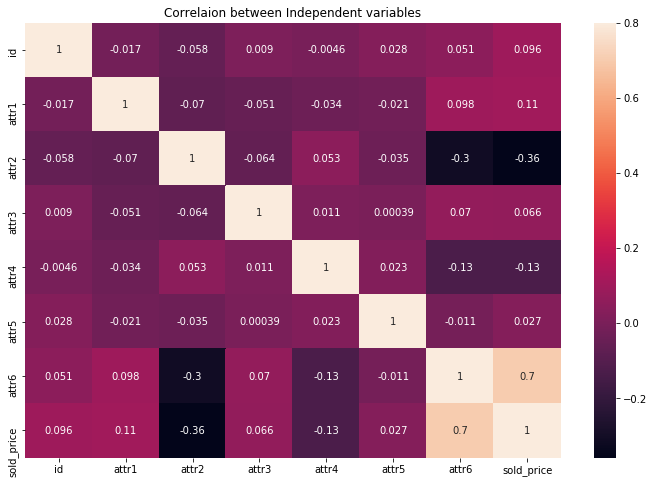

In [24]:
corr = Data_Sample_out.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmax=0.8,annot = True)
plt.title('Correlaion between Independent variables')

In [25]:
Data_Sample_out['sold_price'] = np.log1p(Data_Sample_out['sold_price'])

In [26]:
Data_Sample_out['attr1'].unique(), Data_Sample_out['attr1'].nunique()

(array([4, 3, 2], dtype=int64), 3)

In [27]:
Data_Sample_out['attr2'].unique(), Data_Sample_out['attr2'].nunique()

(array([26, 12, 33,  3, 28, 14, 31, 13, 11, 16,  2, 20, 24,  9, 22, 32, 27,
        21, 25, 34, 17,  6, 30, 19,  7], dtype=int64),
 25)

In [28]:
Data_Sample_out['attr3'].unique(), Data_Sample_out['attr3'].nunique()

(array([225,  30, 267,  89, 240, 180, 188, 170,  31, 274, 252, 258, 277,
        201, 108, 126, 207, 223, 295, 186, 134, 137,  88, 231, 251, 212,
        148,  46, 262,  68, 193,   9, 244, 298, 178, 279,  40,  59, 302,
         44,  14, 300, 215, 159, 141, 229, 304, 282,  24, 176, 271, 181,
         27,  13, 139, 138,   8, 109,  12,  51,   4, 101, 121,  64, 163,
         75,  45, 278,  39, 280, 197, 224,  58, 199,  63, 235,  87, 146,
         72, 289, 177, 161,  38,  86, 169, 273, 167,  26, 242,  37,  50,
        192, 301, 153, 266,  11,  32,  10,  67, 216, 281, 214, 165, 288,
        149, 218, 168, 133,   3, 257, 173, 131, 285, 205, 247, 268, 276,
          7, 202, 226, 151, 195, 259,  82,  85, 113, 294, 102,  83, 270,
        306, 290, 253,  54,  43, 239, 154, 179,  25,  49,  90, 125, 208,
        249, 116, 196,  36, 261, 184, 150,  57, 119, 230, 227,  69,  35,
        204, 243, 246,  61,  84,   1, 187, 248,  66, 265, 115, 120, 124,
        140, 254, 114,  34, 250, 132, 100, 219, 164

In [29]:
Data_Sample_out['attr4'].unique(), Data_Sample_out['attr4'].nunique()

(array([3777, 5520, 3871, ...,  608, 3990,   82]), 4109)

In [30]:
Data_Sample_out['attr5'].unique(), Data_Sample_out['attr5'].nunique()

(array([0, 2, 1, 3]), 4)

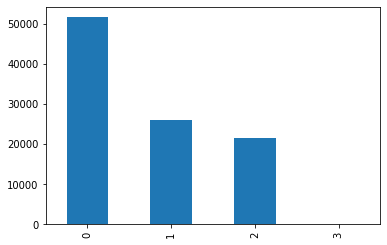

In [31]:
Data_Sample_out['attr5'].value_counts().plot(kind='bar')

In [32]:
Data_Sample_out['attr6'].unique(), Data_Sample_out['attr6'].nunique()

(array([  30,  585,    0, ..., 2223, 1397, 1462]), 1386)

# Feature Attr4

In [33]:
df1_attr4 = Data_Sample_out['attr4'].value_counts(ascending=False)
print('The Count less than 10 are',len(df1_attr4[df1_attr4>10]))
print('The total row data in',len(df1_attr4))
print('The COunt more than 10 are',len(df1_attr4[df1_attr4<=10]))

The Count less than 10 are 737
The total row data in 4109
The COunt more than 10 are 3372


In [34]:
df1_attr4_less_than_10 = df1_attr4[df1_attr4<=10]

In [35]:
print('The total count in row data',df1_attr4_less_than_10.values.sum())

The total count in row data 9526


# Feature Attr6

In [36]:
df1_attr6 = Data_Sample_out['attr6'].value_counts(ascending=False)
print('The Count less than 10 are',len(df1_attr6[df1_attr6>10]))
print('The total row data in',len(df1_attr6))
print('The COunt more than 10 are',len(df1_attr6[df1_attr6<=10]))

The Count less than 10 are 489
The total row data in 1386
The COunt more than 10 are 897


In [37]:
print('The total count in row data',df1_attr6.values.sum())

The total count in row data 99456


In [38]:
df1_attr6_less_than_10 = df1_attr6[df1_attr6<=10]

# Feature Attr3

In [39]:
df1_attr3 = Data_Sample_out['attr3'].value_counts(ascending=False)
print('The Count less than 50 are',len(df1_attr3[df1_attr3>20]))
print('The total row data in',len(df1_attr3))
print('The COunt more than 50 are',len(df1_attr3[df1_attr3<=20]))

The Count less than 50 are 179
The total row data in 223
The COunt more than 50 are 44


In [40]:
print('The total count in row data',df1_attr3.values.sum())

The total count in row data 99456


In [41]:
df1_attr3_less_than_20 = df1_attr3[df1_attr3<=20]

# Dimensionality Reduction

In [42]:
df1_attr4_less_than_10 = df1_attr4_less_than_10[df1_attr4_less_than_10<=10]

In [43]:
len(Data_Sample_out.attr4.unique())

4109

In [44]:
Data_Sample_out.attr4 = Data_Sample_out.attr4.apply(lambda x: 'other' if x in df1_attr4_less_than_10 else x)
len(Data_Sample_out.attr4.unique())

738

In [45]:
df1_attr6_less_than_10 = df1_attr6_less_than_10[df1_attr6_less_than_10<=10]

In [46]:
len(Data_Sample_out.attr6.unique())

1386

In [47]:
Data_Sample_out.attr6 = Data_Sample_out.attr6.apply(lambda x: 'other' if x in df1_attr6_less_than_10 else x)
len(Data_Sample_out.attr6.unique())

490

In [48]:
df1_attr3_less_than_20 = df1_attr3_less_than_20[df1_attr3_less_than_20<=20]

In [49]:
len(Data_Sample_out.attr3.unique())

223

In [50]:
Data_Sample_out.attr3 = Data_Sample_out.attr3.apply(lambda x: 'other' if x in df1_attr3_less_than_20 else x)
len(Data_Sample_out.attr3.unique())

180

In [51]:
renaming_data_sampless_SSS = Data_Sample_out.copy()

In [52]:
renaming_data_sampless_SSS['attr3'].replace(to_replace =['other'],  
                            value = -999, inplace = True) 

In [53]:
renaming_data_sampless_SSS['attr4'].replace(to_replace =['other'],  
                            value = -999, inplace = True) 

In [54]:
renaming_data_sampless_SSS['attr6'].replace(to_replace =['other'],  
                            value = -999, inplace = True) 

In [55]:
X = renaming_data_sampless_SSS[['attr1','attr2','attr3','attr4','attr5','attr6']]
y = renaming_data_sampless_SSS['sold_price'].values

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_Scaled = sc.fit_transform(X)

X_train = pd.DataFrame(X_Scaled, columns = X.columns)

In [57]:
X_train.isnull().sum()

attr1    0
attr2    0
attr3    0
attr4    0
attr5    0
attr6    0
dtype: int64

In [58]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x,train_y, test_y = tts(X_train, y, random_state=49, test_size=0.2)

In [59]:
train_x.shape , train_y.shape, test_x.shape, test_y.shape

((79564, 6), (79564,), (19892, 6), (19892,))

In [60]:
def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2,5],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Ridge': {
            'model': Ridge(),
            'parameters': {
                'alpha': [1e-15,1e-2, 1, 5, 10], #0, 1, 0.01
                
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

In [ ]:
find_best_model(X_train,y)

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    return errors

In [ ]:
base_model = DecisionTreeRegressor( random_state = 42)
base_model.fit(train_x, train_y)
evaluate(base_model, test_x, test_y)

In [ ]:
base_model = DecisionTreeRegressor( random_state = 42)
base_model.fit(train_x, train_y)
predictions = base_model.predict(test_x)

In [ ]:
predictions_xtest = predictions[0:100]

In [ ]:
X_feat = base_model.feature_importances_

In [ ]:
pd.DataFrame(X_feat, index= X.columns).rename(columns={0: 'Importance'}).sort_values('Importance',ascending = False)

In [ ]:
def predict_price(attr1,attr2,attr3,attr4,attr5,attr6):
    
    x =np.zeros(len(X.columns))
        
    x[0]= attr1
    x[1]= attr2
    x[2]= attr3
    x[3]= attr4
    x[4]= attr5
    x[5]= attr6
    
    Final_output = base_model.predict([x])[0]
    output = Final_output
    output = int(output)
    
    if output in range(0,50):
        output = '0-50'
    elif output in range(50,100):
        output ='50-100'
    elif output in range(100,500):
        output='100-500'
    elif output in range(500,1000):
        output='500-1000'
    else:
        output = '1000+'
        
    return output

In [ ]:
predict_price(4,26,225,1996,0,250)

In [ ]:
predict_price(1,1,40,10,0,100)

In [ ]:
solution_bo = pd.DataFrame(predictions_xtest, columns = ['Predicted_Price'])
solution_bo1 = pd.DataFrame(datasets_id, columns = ['id'])
Final_prediction = pd.concat([solution_bo1,solution_bo], axis =1)

In [ ]:
Final_prediction.head()

# NLP on Title COlumns

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

In [ ]:
Data_Sample_out_nlp = Data_Sample_out.copy()

In [ ]:
Data_Sample_out_nlp

In [ ]:
Data_Sample_out_nlp['title'] = Data_Sample_out_nlp['title'].astype(str)

In [ ]:
def clean_text(text):
    text = ''.join(c for c in text if not c.isdigit())
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'[!!-...]', '', text)
    text = re.sub(r',', ' ', text)
    text = re.sub(r' - ', ' ', text)
    text = re.sub(r' -m', ' ', text)
    text = re.sub(r'n', ' ', text)
    text = re.sub(r'%', ' ', text)
    text = re.sub(r'[()]', '', text)
    text = re.sub(r'  ', ' ', text)
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

#text = re.sub(re.compile(r'\s+'), '', text)  #to remove space from the string

In [ ]:
Data_Sample_out_nlp['Title'] = Data_Sample_out_nlp['title'].apply(clean_text)

In [ ]:
Data_Sample_out_nlp

In [ ]:
## Number of words in the Title ##
Data_Sample_out_nlp["Syn_num_words"] = Data_Sample_out_nlp["Title"].apply(lambda x: len(str(x).split()))
## Number of unique words in the Title ##
Data_Sample_out_nlp["Syn_num_unique_words"] = Data_Sample_out_nlp["Title"].apply(lambda x: len(set(str(x).split())))
## Number of characters in the Title ##
Data_Sample_out_nlp["Syn_num_chars"] = Data_Sample_out_nlp["Title"].apply(lambda x: len(str(x)))
## Number of stopwords in the Title ##
Data_Sample_out_nlp["Syn_num_stopwords"] = Data_Sample_out_nlp["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [ ]:
Data_Sample_out_nlp

In [ ]:
### Fit transform the tfidf vectorizer ###
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),max_features=150)
full_tfidf = tfidf_vec.fit_transform(Data_Sample_out_nlp['Title'].values.tolist())
train_tfidf = tfidf_vec.transform(Data_Sample_out_nlp['Title'].values.tolist())
train_tfidf

In [ ]:
full_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=tfidf_vec.get_feature_names())

In [ ]:
full_tfidf.shape

In [ ]:
full_tfidf.head()